In [19]:
import os
import pandas as pd
import re

# Define a function to process a score_iteration line
def process_score_iteration(line, filename):
    # Use regular expressions to extract relevant information
    match = re.match(r'Iteration_(\d+): (\S+) - (\S+) Scores: pisa:(.+) bach:(.+) firedock:(.+) irad:(.+) totalbmfbluues:(.+) bmf:(.+) bluues:(.+) zrank:(.+)  Sequence:(\S+)', line)

    if match:
        iteration = match.group(1)
        mutation = match.group(2)
        score = match.group(3)
        pisa = match.group(4)
        bach = match.group(5)
        firedock = match.group(6)
        irad = match.group(7)
        totalbmfbluues = match.group(8)
        bmf = match.group(9)
        bluues = match.group(10)
        zrank = match.group(11)
        sequence = match.group(12)

        return {
            'file_name': filename,
            'number_iteration': filename.split('_')[2].split('.')[0],
            'set_iteration': filename.split('_')[3].split('.')[0],
            'general_iteration': None,  # You will calculate this later
            'Mutation': mutation,
            'Score': score,
            'pisa': float(pisa),
            'bach': float(bach),
            'firedock': float(firedock),
            'irad': float(irad),
            'totalbmfbluues': float(totalbmfbluues),
            'bmf': float(bmf),
            'bluues': float(bluues),
            'zrank': float(zrank),
            'Sequence': sequence
        }
    else:
        return None


# Custom sorting function for the filenames
def custom_sort(filename):
    parts = re.findall(r'\d+', filename)
    if len(parts) >= 2:
        return int(parts[1]) * 100 + int(parts[0])
    return 0

# Directory containing the score_iteration files
score_iterations_dir = '/home/nacho/Escritorio/doctorado/Resultados/SurA/PARCE-SurA/Iterations_juntas/'

# Get a list of filenames in the directory
filenames = os.listdir(score_iterations_dir)

# Sort the filenames
sorted_filenames = sorted(filenames, key=custom_sort)

# Directory containing the score_iteration files
score_iterations_dir = '/home/nacho/Escritorio/doctorado/Resultados/SurA/PARCE-SurA/Iterations_juntas/'

# List the files in the directory and sort them
files = os.listdir(score_iterations_dir)
files.sort(key=custom_sort)

# Initialize a list to store the parsed data
data = []

# Process all score_iteration files in the sorted order
for filename in files:
    if filename.startswith("score_iterations"):
        with open(os.path.join(score_iterations_dir, filename), 'r') as file:
            lines = file.readlines()

        for line in lines:
            score_iteration = process_score_iteration(line, filename)  # Pass the filename to the processing function
            if score_iteration:
                data.append(score_iteration)

# Create a pandas DataFrame from the parsed data
df = pd.DataFrame(data)

# Reset the index after sorting
df.reset_index(drop=True, inplace=True)

# Create the 'number_iteration' column
df['number_iteration'] = df['file_name'].str.extract(r'score_iterations_(\d+)')

# Create the 'set_iteration' column
df['set_iteration'] = df['file_name'].str.extract(r'score_iterations_\d+_(\d+).txt')

# Create the 'file_name' column
df['file_name'] = df['file_name'].str.extract(r'([^/]+)$')

# Sort the DataFrame by 'number_iteration' and 'set_iteration'
df['number_iteration'] = df['number_iteration'].astype(int)
df['set_iteration'] = df['set_iteration'].astype(int)

df = df.sort_values(by=['set_iteration', 'number_iteration'])

# Add the 'general_iteration' column
df['general_iteration'] = range(1, len(df) + 1)
# Define the order of columns
column_order = [
    'general_iteration', 'Mutation', 'Score', 'pisa', 'bach', 'firedock', 'irad',
    'totalbmfbluues', 'bmf', 'bluues', 'zrank', 'Sequence', 'file_name',
    'number_iteration', 'set_iteration'
]

# Reorder the DataFrame columns
df = df[column_order]

# Save the DataFrame to a CSV file
#df.to_csv('mutation_report.csv', index=False)
df[:11]


,general_iteration,Mutation,Score,pisa,bach,firedock,irad,totalbmfbluues,bmf,bluues,zrank,Sequence,file_name,number_iteration,set_iteration
0,1,LB4G,Rejected,-0.230154,-6.559154,-27.402308,-108.335538,-37.221808,-25.610231,-199.265808,-46.032154,NFTGKFWDIFRK,score_iterations_1_1.txt,1,1
1,2,FB10I,Accepted,-0.310115,-5.438923,-51.291538,-151.382538,-52.300000,-30.724846,-285.543923,-85.451538,NFTLKFWDIIRK,score_iterations_2_1.txt,2,1
2,3,IB10P,Rejected,-0.198654,-2.784308,-24.209615,-97.821731,-39.980808,-17.734885,-224.363923,-51.894192,NFTLKFWDIPRK,score_iterations_3_1.txt,3,1
3,4,TB3C,Rejected,-0.302423,-4.710615,-46.179231,-145.063077,-48.629538,-28.810885,-265.248462,-79.439192,NFCLKFWDIIRK,score_iterations_4_1.txt,4,1
4,5,FB6M,Rejected,-0.244615,-5.254308,-49.840000,-145.355808,-43.122385,-32.895923,-227.445769,-76.287231,NFTLKMWDIIRK,score_iterations_5_1.txt,5,1
5,6,IB10M,Rejected,-0.272846,-6.492077,-36.084615,-163.928731,-44.183038,-33.370077,-233.393808,-83.419423,NFTLKFWDIMRK,score_iterations_6_1.txt,6,1
6,7,LB4I,Rejected,-0.261192,-5.075115,-38.922308,-131.927577,-41.852038,-28.470846,-224.396654,-63.169000,NFTIKFWDIIRK,score_iterations_7_1.txt,7,1
7,8,LB4P,Rejected,-0.199769,-4.854423,-38.016923,-108.267885,-37.525231,-25.155192,-201.591923,-54.225654,NFTPKFWDIIRK,score_iterations_8_1.txt,8,1
8,9,LB4A,Accepted,-0.331038,-6.450500,-55.810385,-143.332308,-48.888269,-32.577923,-262.840385,-79.009231,NFTAKFWDIIRK,score_iterations_9_1.txt,9,1
9,10,TB3V,Rejected,-0.305269,-6.159000,-53.818462,-146.971385,-52.245308,-31.011538,-284.908500,-82.149923,NFVAKFWDIIRK,score_iterations_10_1.txt,10,1


In [3]:
df.columns

Index(['general_iteration', 'Mutation', 'Score', 'pisa', 'bach', 'firedock',
       'irad', 'totalbmfbluues', 'bmf', 'bluues', 'zrank', 'Sequence',
       'file_name', 'number_iteration', 'set_iteration'],
      dtype='object')

Graficos con todas las mutaciones

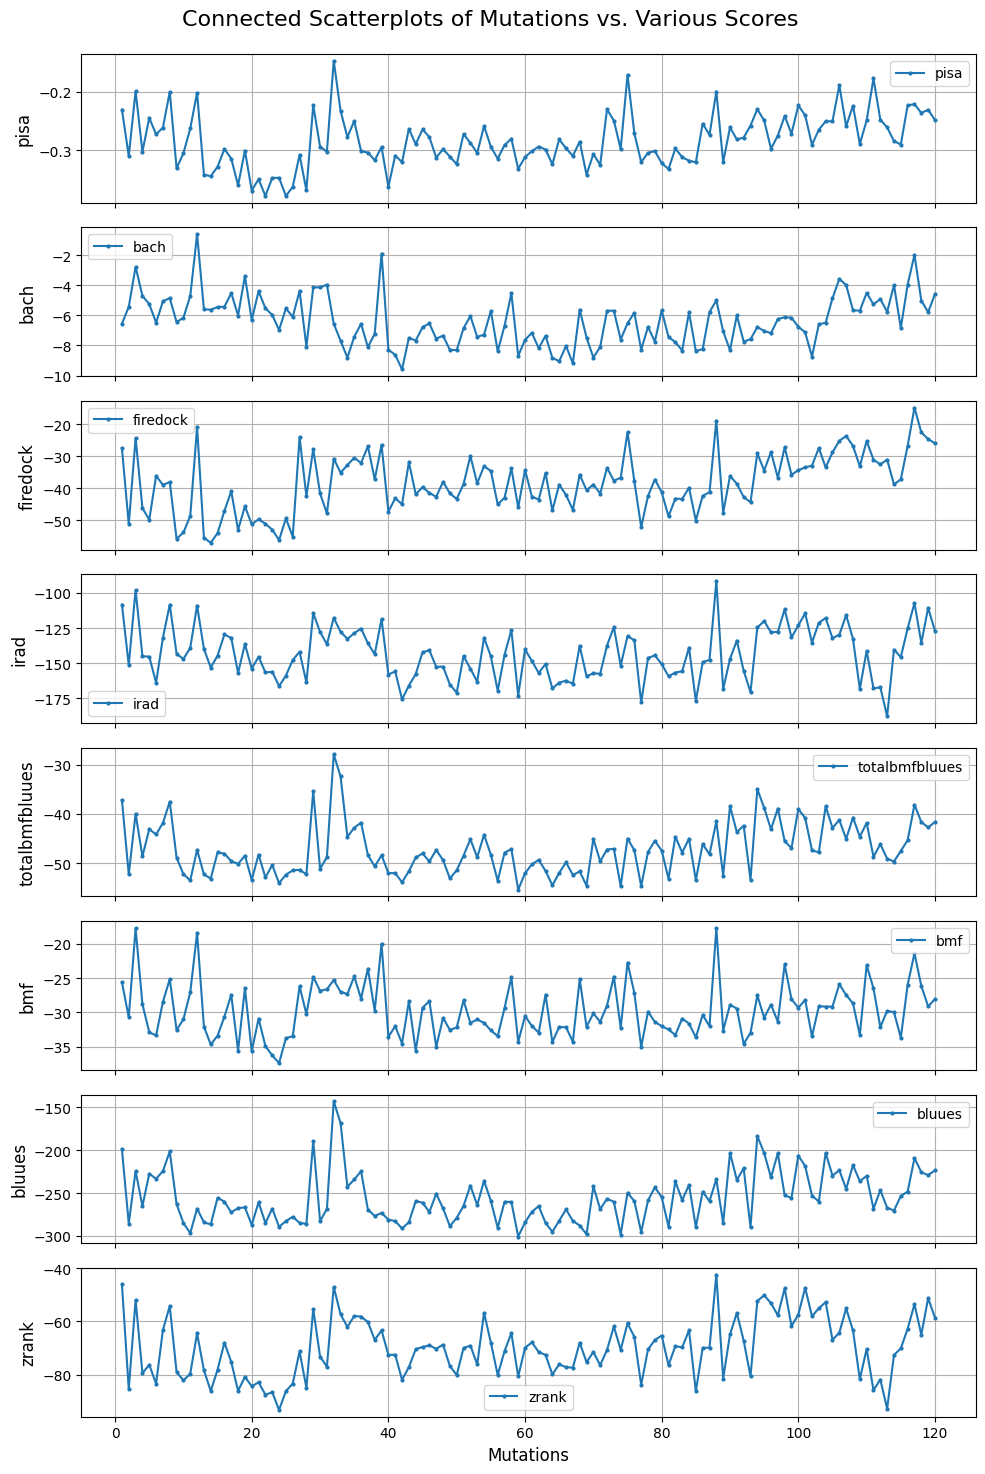

In [7]:
#Graficos con todas las mutaciones
import matplotlib.pyplot as plt

# Create subplots for each column
columns = ['pisa', 'bach', 'firedock', 'irad', 'totalbmfbluues', 'bmf', 'bluues', 'zrank']

# Set up subplots
fig, axs = plt.subplots(len(columns), sharex=True, figsize=(10, 15))
fig.suptitle('Connected Scatterplots of Mutations vs. Various Scores', fontsize=16)

# Iterate through each column
for i, column in enumerate(columns):
    ax = axs[i]

    # Create the scatterplot
    ax.plot(df['general_iteration'], df[column], marker='o', linestyle='-', markersize=2, label=column)
    ax.set_ylabel(column, fontsize=12)

    # Customize the appearance
    ax.grid(True)
    ax.legend()

# Set labels and title for the x-axis
axs[-1].set_xlabel('Mutations', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Graficos con las mutaciones aceptadas

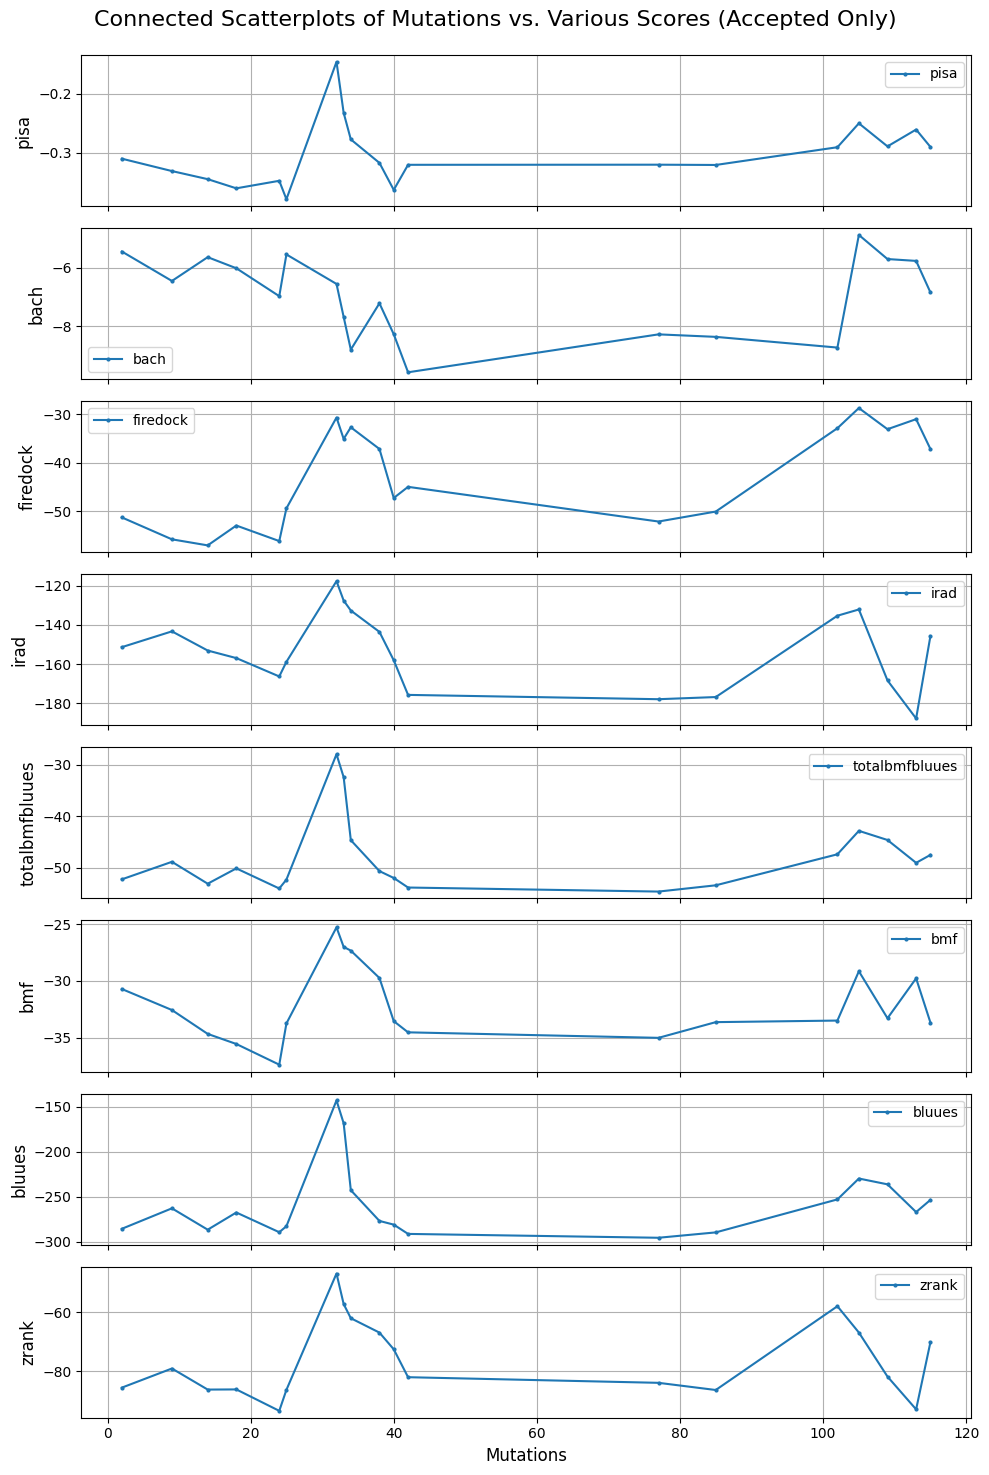

In [8]:
import matplotlib.pyplot as plt

# Create subplots for each column
columns = ['pisa', 'bach', 'firedock', 'irad', 'totalbmfbluues', 'bmf', 'bluues', 'zrank']

# Set up subplots
fig, axs = plt.subplots(len(columns), sharex=True, figsize=(10, 15))
fig.suptitle('Connected Scatterplots of Mutations vs. Various Scores (Accepted Only)', fontsize=16)

# Filter the DataFrame for rows where 'Score' is 'Accepted'
accepted_df = df[df['Score'] == 'Accepted']

# Iterate through each column
for i, column in enumerate(columns):
    ax = axs[i]

    # Create the scatterplot for 'Accepted' rows
    ax.plot(accepted_df['general_iteration'], accepted_df[column], marker='o', linestyle='-', markersize=2, label=column)
    ax.set_ylabel(column, fontsize=12)

    # Customize the appearance
    ax.grid(True)
    ax.legend()

# Set labels and title for the x-axis
axs[-1].set_xlabel('Mutations', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


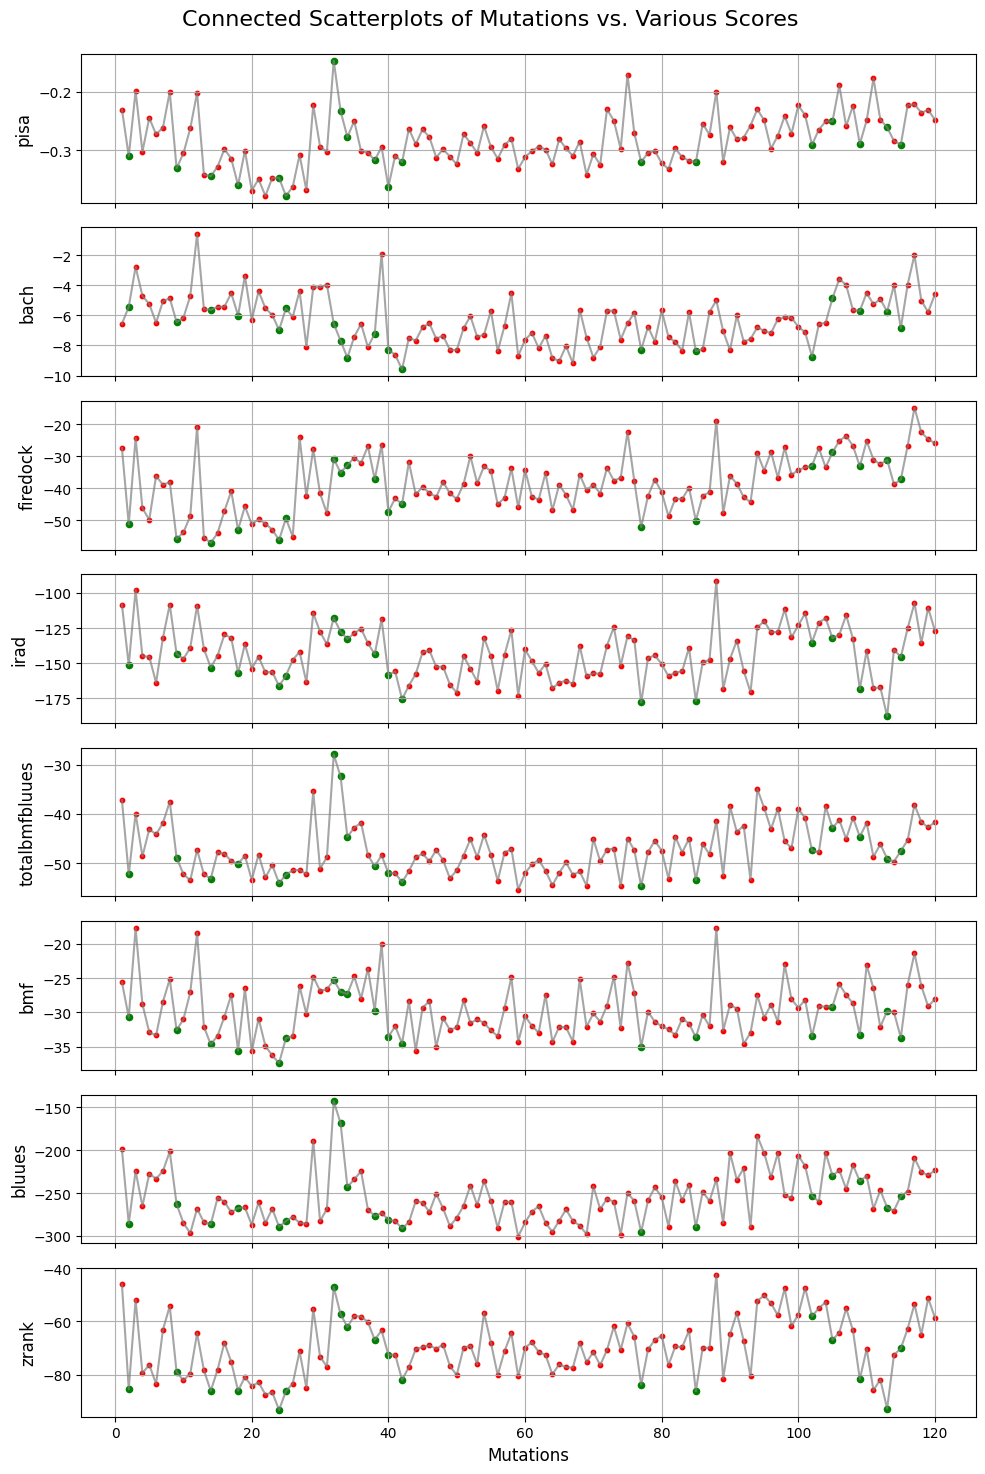

In [14]:
import matplotlib.pyplot as plt

# Define the list of scoring functions
columns = ['pisa', 'bach', 'firedock', 'irad', 'totalbmfbluues', 'bmf', 'bluues', 'zrank']

# Set up subplots
fig, axs = plt.subplots(len(columns), sharex=True, figsize=(10, 15))
fig.suptitle('Connected Scatterplots of Mutations vs. Various Scores', fontsize=16)

# Define a color map for accepted (green) and rejected (red) mutations
color_map = {'Accepted': 'green', 'Rejected': 'red'}

# Iterate through each column
for i, column in enumerate(columns):
    ax = axs[i]

    # Store points for connecting lines
    x = []
    y = []

    # Create the scatterplot
    for index, row in df.iterrows():
        color = color_map.get(row['Score'], 'blue')  # Use green for 'Accepted', red for 'Rejected'
        size = 20 if row['Score'] == 'Accepted' else 10  # Increase size for 'Accepted'
        ax.scatter(row['general_iteration'], row[column], c=color, s=size, label=column)
        x.append(row['general_iteration'])
        y.append(row[column])

    # Connect the points with a gray line
    ax.plot(x, y, color='gray', linewidth=1.5, alpha=0.7)

    ax.set_ylabel(column, fontsize=12)

    # Customize the appearance
    ax.grid(True)

# Set labels and title for the x-axis
axs[-1].set_xlabel('Mutations', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Pairplot para ver correlaciones entre funciones de scoring

/tmp/ipykernel_35227/41262231.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Score'] = df['Score']


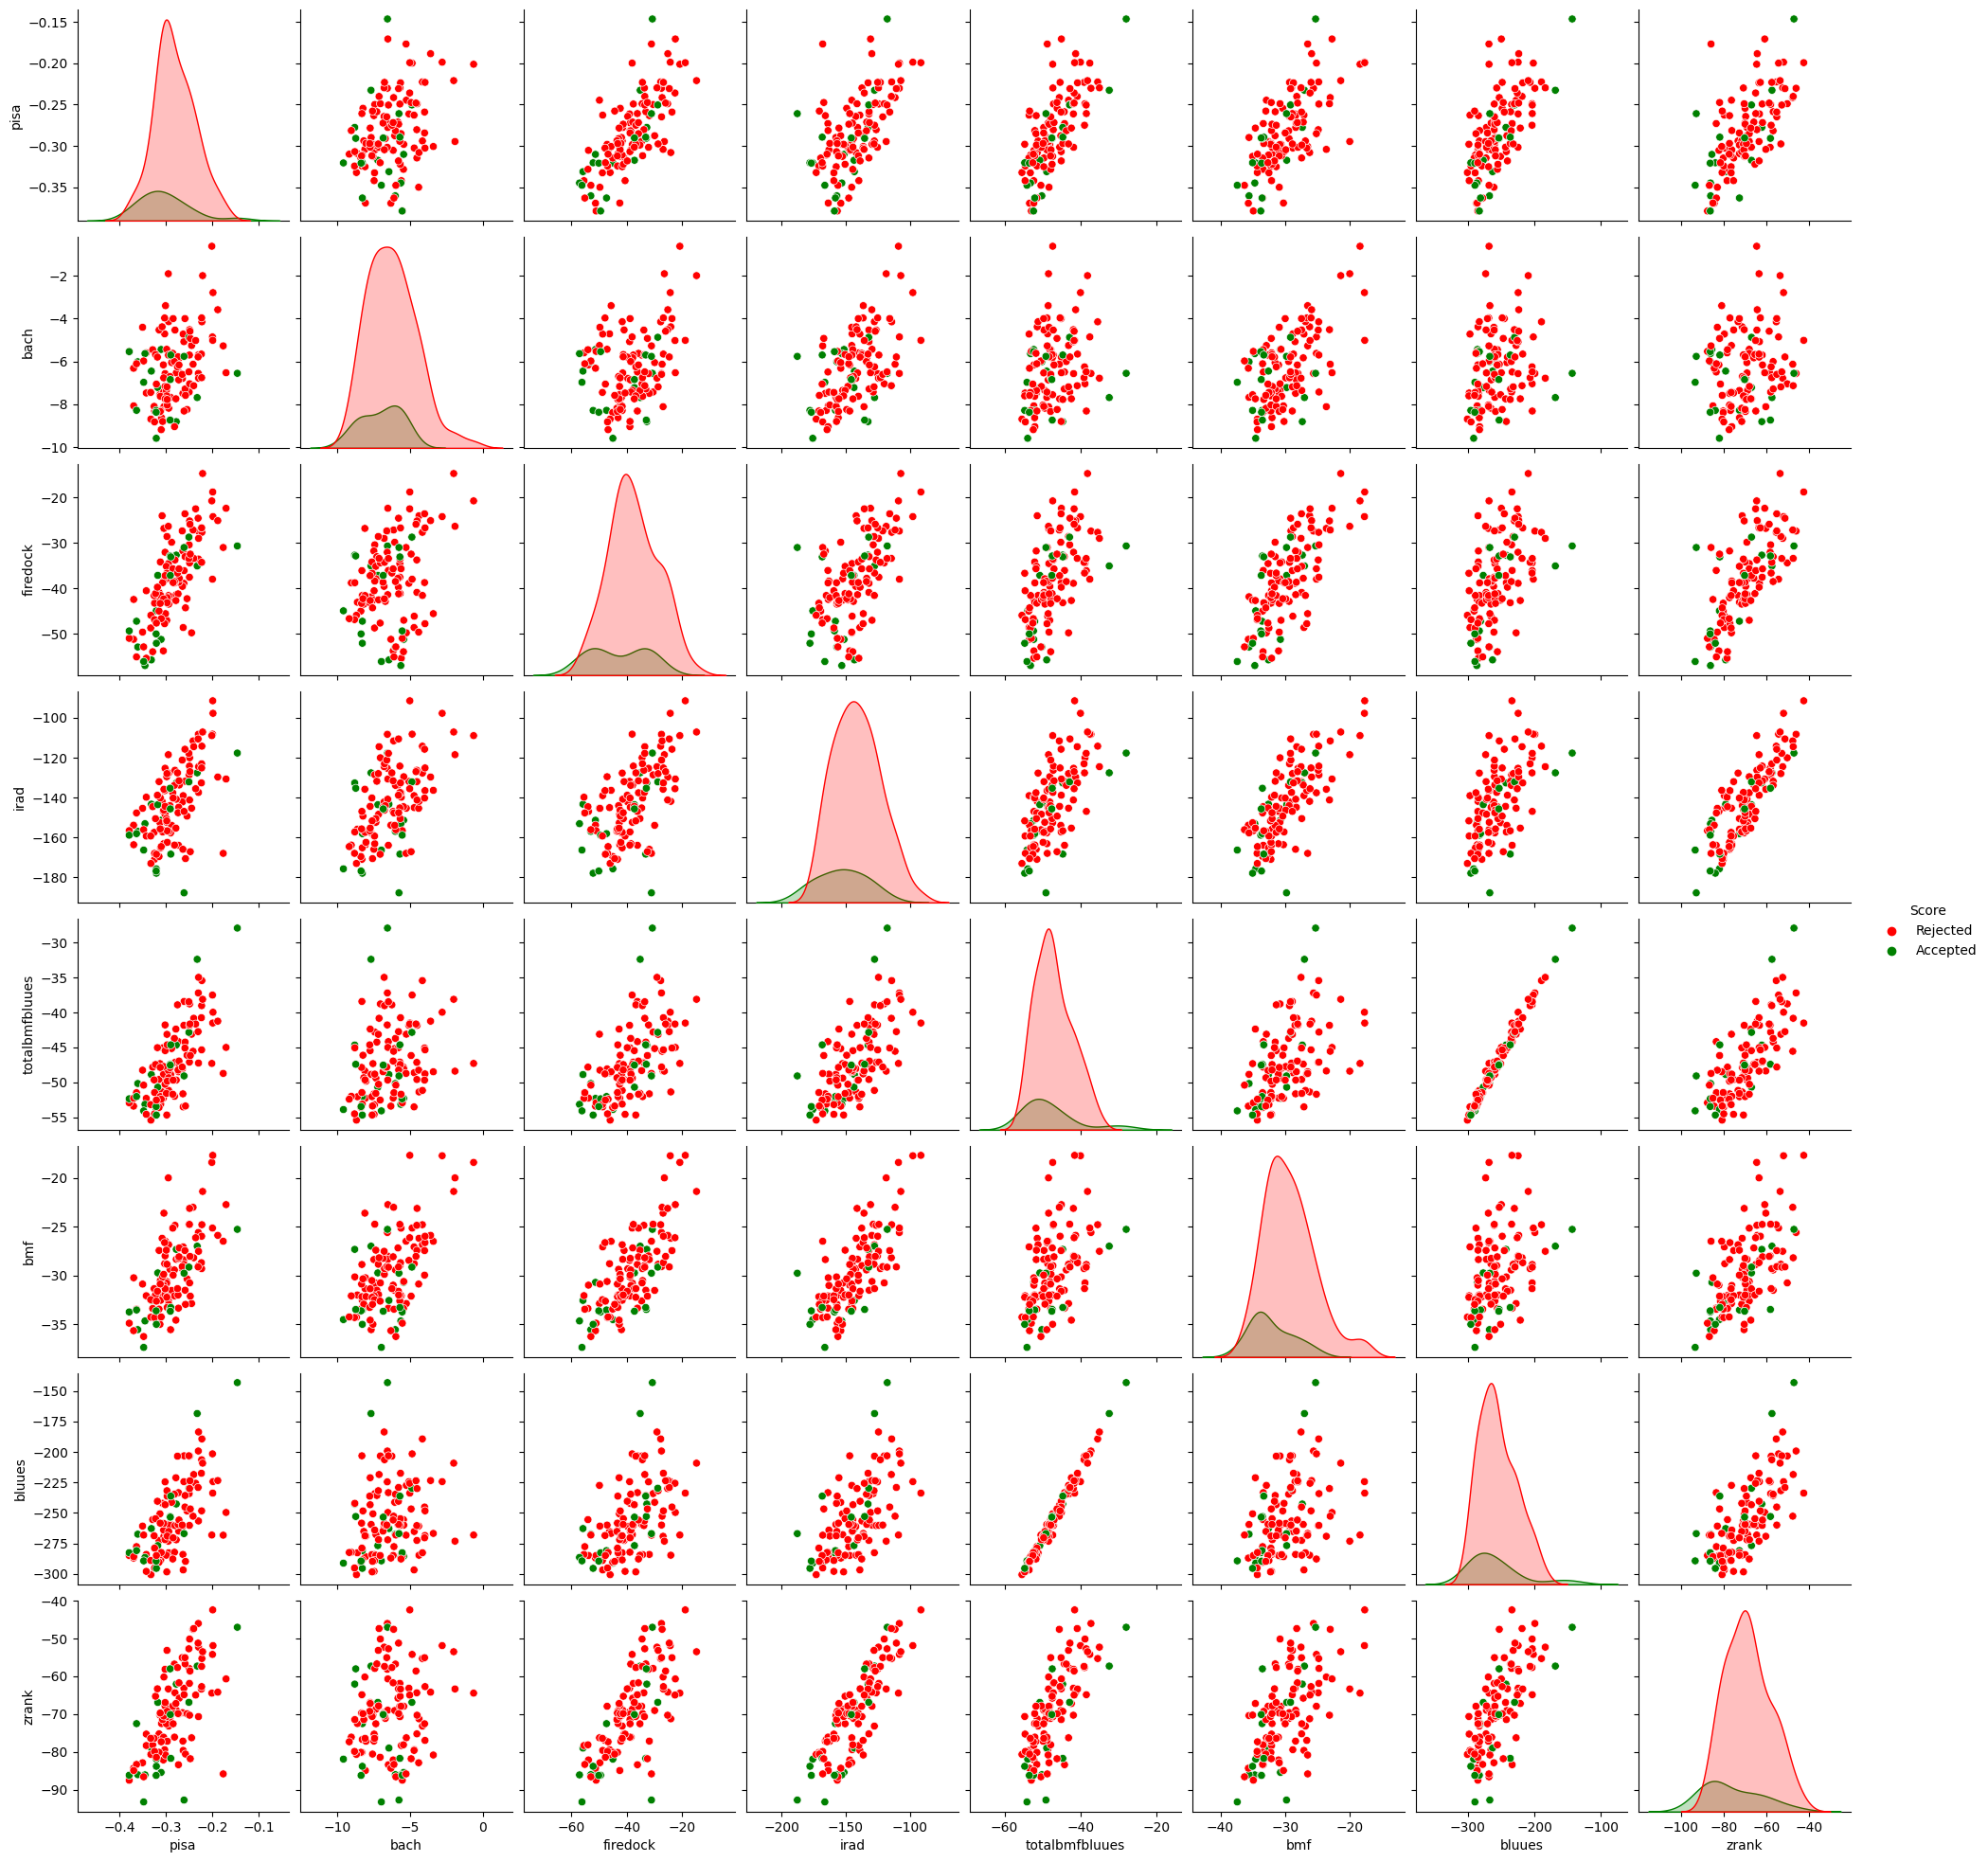

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of scoring functions
columns = ['pisa', 'bach', 'firedock', 'irad', 'totalbmfbluues', 'bmf', 'bluues', 'zrank']

# Select only the relevant columns from your DataFrame
df_subset = df[columns]

# Add the 'Score' column to color the points by Accepted/Rejected
df_subset['Score'] = df['Score']

# Create a pairplot
sns.pairplot(df_subset, hue='Score', palette={'Accepted': 'green', 'Rejected': 'red'})
plt.show()


Matriz de correlacion para evaluar la correlacion de Pearson entre las funciones de scoring

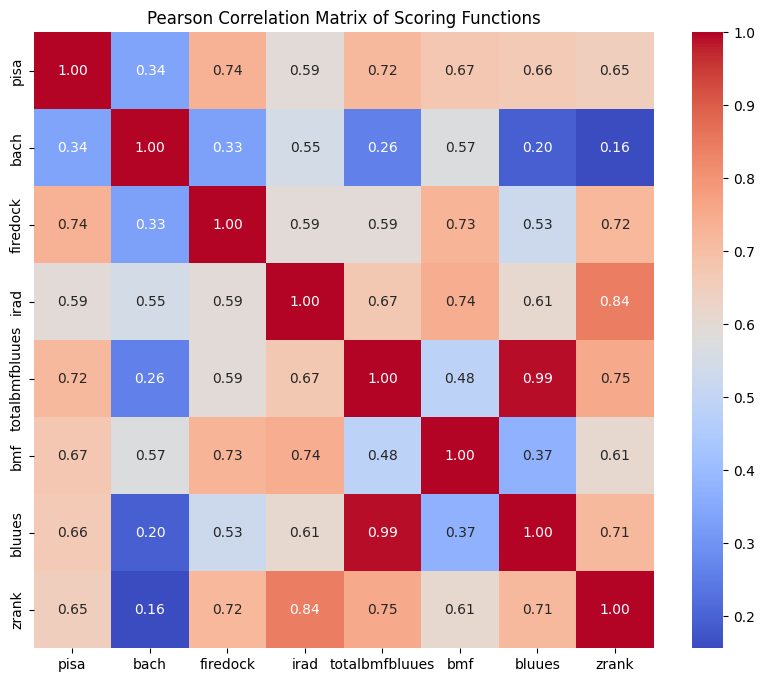

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of scoring functions
columns = ['pisa', 'bach', 'firedock', 'irad', 'totalbmfbluues', 'bmf', 'bluues', 'zrank']

# Select only the relevant columns from your DataFrame
df_subset = df[columns]

# Calculate the Pearson correlation matrix
correlation_matrix = df_subset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Scoring Functions')
plt.show()


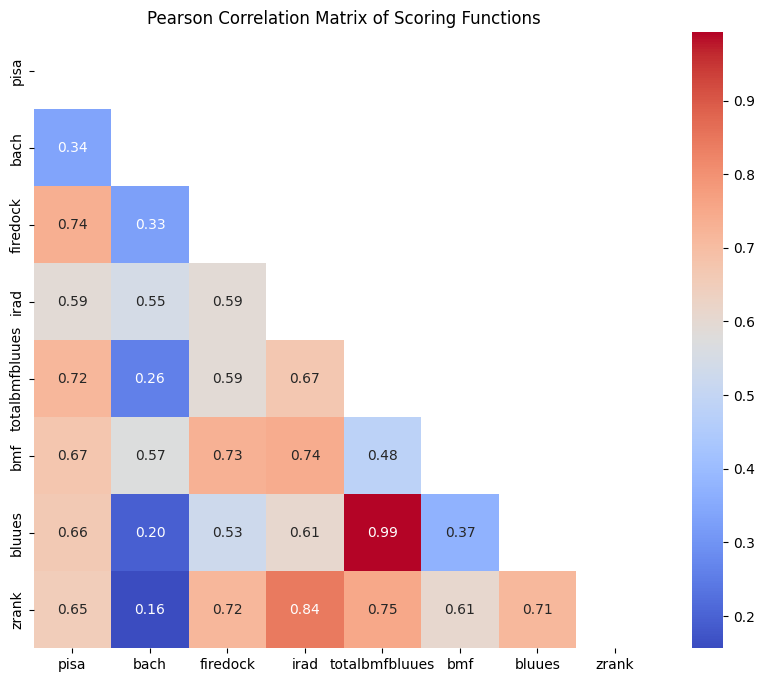

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the list of scoring functions
columns = ['pisa', 'bach', 'firedock', 'irad', 'totalbmfbluues', 'bmf', 'bluues', 'zrank']

# Select only the relevant columns from your DataFrame
df_subset = df[columns]

# Calculate the Pearson correlation matrix
correlation_matrix = df_subset.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Pearson Correlation Matrix of Scoring Functions')
plt.show()
